# Finding Transits

## Tutorial

This code, to be run on the command line, was designed to find transits around young, rapidly rotating stars. The scripts `run.py` and `short_run.py` employ the package `transits` which contain the two classes `GetLC` and `FindTransits`. All together, the basic functionality of the code accomplishes the following:
- loads in a normalized light curve with gaps in the data removed
- performs initial detrending via Fast Fourier Transform which removes the rotation signal for rapid rotators
- carries out the box-least squares method (BLS) on the FFT-detrended light curve to identify initial guesses for the period, time of mid-transit, depth, and duration of a transit
- uses the BLS initial guesses to simultaneously build a transit model and Gaussian process model that detrends the initial light curve, prior to FFT-detrending

### Making light curves

To start, I first make a directory for each cluster of stars that I will analyze, containing the subdirectories:
<br>
`../data/` 
<br>
`../figures/` 
<br>
`../lc/` 

I move a txt file which contains the RA/DEC coordinates for each star into the project directory. I first make light curve FITS files by executing `make_lc.py` in `finding_transits` which uses the multi sector call from `eleanor`, setting `sectors=all`. These FITS files contain light curves with raw flux or corrected flux, but not psf flux. One can easily go into this script and change the `eleanor.TargetData` call to make the psf light curves if so desired.

<br>
In its general form, the call on the command line looks like:

where `project_dir` is the path to the project directory, `txt_file` is the text file containing the coordinates of the stars, and `RA_col` and `DEC_col` are integer values of the column number containing each coordinate

For a specific example: 

### Searching for planets around all of the stars

To do a complete planet search on all of the stars, I navigate to `~/finding_transits/script/` and type on the command line:

I have to once again indicate the path to the project directory and now I specify three more arguments: `lc_type`, `dtype`, and `backend`

`lc_type` corresponds to the type of light curves in which I want to search for transits. There are three possible options for `lc_type`: 
 
`do_corr` 
<br>
`do_psf`
<br>
`do_raw`
 
These calls correspond to working with corrected, psf, or raw light curves. If I am interested in working with raw or psf light curves, I make additional subdirectories in the cluster directory  `../psf_data/` and `../psf_figures/` or `../raw_data` and `../raw_figures`, which the relevant figures or data sets will be saved to. 

 
`dtype` corresponds to whether I want to load in my light curves by remaking them through calling the tic ID or by using the prexisting files which I made in the first step. There are two possible options for `dtype`: 
 
`use_files` 
<br>
`use_tics`
 
 
There are two possible options for `backend`: 
 
`default` 
<br>
`Agg`

As an example:

### Running on one star 

To do a more tailored search on a single star, remaining in `~/finding_transits/script/`, the command line code looks like:

`tic` is the integer TIC ID for the star.
 
`run_type` corresponds to the type of analysis I am interested in doing. There are three possible selections for `run_type`:
 
-`run_all` 
<br>
-`even_odd`
<br>
-`EB`
 
`run_all` corresponds to the simple case of searching for a planet around the star. For each TIC ID, one transit model is built at a time. If the code determines that a planet is possibly in the light curve, it rebuilds another transit model with the previous transits masked until no more signals are found. When we execute `run.py` and perform a complete planet search, `run_all` is the default

 
`even_odd` is used when I have already identified a candidate planet and I am prepared to run the even-odd test on the single TIC ID to vet the system. Specifying `even_odd` builds *two* transit models for the data: even and odd transits. If `even_odd` is specified, I make another subdirectory `../even_odd` in my project directory, which data and figures will be saved to. 
 
 
`EB` is used when I have already identified a possible eclipsing binary stellar system. The resulting code that is executed downstream is very similar to when `even_odd` is called since two "transit" models are being built: one for the primary eclipse and one for the secondary eclipse.
    


As an example:

### Visually inspecting planet candidates

In `~/finding_transits/`, I have also included a script `planets.py` to be used after a complete search which spits out the number of possible planetary systems, the number of TICs that were analyzed, and the list of TIC IDs that may host planets. To confirm whether a transit was indeed found, I manually go through all of the GP model figures corresponding to each of the possible TICs. 
 
 As an example of the call:

### Working with data or figures

For a simple planet search, after `run.py` or `short_run.py` are finished running, 9 figures are saved for a given "run" on a given light curve. These figures include:
- normalized light curve (norm_lc)
- lomb scargle periodogram prior to FFT-detrending (raw_lombscarg)
- FFT 
- notch filter which removes the dominant rotation signal identified with FFT
- lomb scargle periodogram after FFT-detrending (det_lombscarg)
- normalized FFT-detrended light curve (det_lc)
- folded light curve after BLS (box_plot)
- GP model, GP-detrended light curve, and residuals (GPmodel_lc)
- GP model, GP-detrended light curve, and residuals assuming no planet/signal is present in the light curve (no_pl_GPmodel_lc)

Two sets of results are saved as pickle files: data and modeling_results

In [1]:
import pickle

In [2]:
path = '/Users/nicholasearley/TESS_data/columba/data/'

In [3]:
data = pickle.load(open(path+'data_tic77951245.p', 'rb'))
model = pickle.load(open(path+'modeling_results_tic77951245.p', 'rb'))

The run number corresponds to the step in the search for the transiting signal. The last listed run number associated with a TIC is ruled to be not a signal due to the small enough change in log likelihoods between the no planet model and the planet model for the given run. 

 
For example, there are two sets of results for each key in data and model. There may be a transiting signal in the results that correspond to run 0, but there is not a signal in the results corresponding to run 1. Note the delta log likelihood comparing planet models to no planet models for each run.

In [4]:
data

{'Cadences': [array([10106., 10107., 10108., ..., 12601., 12602., 12603.]),
  array([10106., 10107., 10108., ..., 12601., 12602., 12603.])],
 'Normalized Error': [array([0.00140724, 0.00138686, 0.00136758, ..., 0.00208616, 0.00208736,
         0.0020888 ]),
  array([0.00140724, 0.00138686, 0.00136758, ..., 0.00208616, 0.00208736,
         0.0020888 ])],
 'Normalized Flux': [array([0.99921254, 0.99964456, 1.00042095, ..., 1.00505681, 1.00506741,
         1.00344421]),
  array([0.99921254, 0.99964456, 1.00042095, ..., 1.00505681, 1.00506741,
         1.00344421])],
 'Run': [0, 1],
 'Time': [array([1438.0140859 , 1438.03495984, 1438.05583379, ..., 1489.99298411,
         1490.01379702, 1490.03467096]),
  array([1438.0140859 , 1438.03495984, 1438.05583379, ..., 1489.99298411,
         1490.01379702, 1490.03467096])]}

In [5]:
model

{'BLS Depth': [0.0429974851929806, 0.013960679254426886],
 'BLS Duration': [0.05, 0.2],
 'BLS Period': [10.712204106484393, 13.40606257171378],
 'BLS T0': [7.74, 3.605],
 'Delta Log Likelihood': [1250.2942462232113, 1.6424413965960412],
 'Masks of Outliers': [array([ True,  True,  True, ...,  True,  True,  True]),
  array([ True,  True,  True, ...,  True,  True,  True])],
 'No Planet Solns': [{'b': array(0.45),
   'b_interval__': array(1.26147684e-08),
   'ecc': array(0.22247843),
   'ecc_interval__': array(-1.25126837),
   'light_curves': array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   'logP': array(2.37138366),
   'logQ0': array(-7.935385),
   'logamp': array(-11.13988952),
   'logdeltaQ': array(-11.56563174),
   'loglikelihood': array(9421.48888583),
   'logr': array(-1.74418677),
   'logr_interval__': array(0.62415367),
   'logrotperiod': array(1.68985699),
   'logs2': array(-18.71494442),
   'm_star': array(1.0964105

In [6]:
run = 0
mask = model['Masks of Outliers'][run]
time = data['Time'][run][mask]
norm_flux = data['Normalized Flux'][run][mask]

To find the GP model, we take the pred flux values found within Planet Solns and add them to the mean flux. To get the GP-detrended flux we subtract our GP fit from the normalized flux, with outliers masked. Here, I've added an offset of 1 to the detrended flux.

In [7]:
gp_mod = model['Planet Solns'][run]['pred'] + model['Planet Solns'][run]['mean']
det_flux = (data['Normalized Flux'][run][mask] - gp_mod)+1

In [8]:
import matplotlib.pyplot as plt

You can easily see how the stellar variability from the rotator has been removed by the GP model

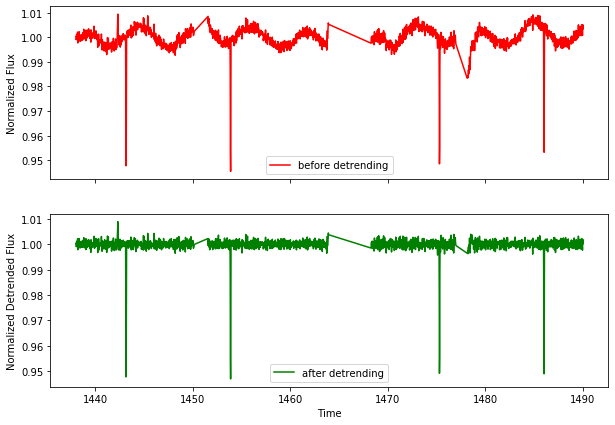

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
ax = axes[0]
ax.plot(time, norm_flux, 'r', label='before detrending')
ax.set_ylabel('Normalized Flux')
ax.legend(loc=8)

ax = axes[1]
ax.plot(time, det_flux, 'g', label='after detrending')
ax.set_ylabel('Normalized Detrended Flux')
ax.legend(loc=8)

plt.xlabel('Time')
plt.show()

In [10]:
per = model['Planet Solns'][run]['period']
t0 = model['Planet Solns'][run]['t0']

In [11]:
print("Period: {}".format(per))
print("Time of mid transit: {}".format(t0))

Period: 10.714583870776464
Time of mid transit: 7.414829189899059


This 5% dip in flux tells us that this signal is too big to be a planet. This is an eclipsing binary! Either the secondary eclipse is of the same depth as the primary, in which case the true period of the system would be twice the printed value or we are only seeing primary eclipses.